# Week 4 Assignment

## Assignment Details
The `1962_2006_walmart_store_openings.csv` file is available here:
https://raw.githubusercontent.com/plotly/datasets/master/1962_2006_walmart_store_openings.csv

It contains information on Walmart store openings between the years 1962-2006. Some explanations on the meaning of variable names:

- `storenum`: the unique store number (storenumber is an id, not a count)	
- `OPENDATE`: the date the original store was opened
- `date_super`: the date the store became a super store
- `conversion`: whether the original store was converted to a super store
- `STRCITY`: the name of the city where the store is located
- `STRSTATE`: the state where the store is located

When answering the questions below, please make sure to examine the dataset carefully and understand if it needs further data aggregation, cleaning, or wrangling before you calcualte the answers to your questions.

#### [GRADED  TASK 1]
Import the dataset and ensure all columns of data are properly read into an appropriate data structure.

In [1]:
# Your answer to Graded Task 1 here:
import datetime
import pandas as pd

csvdata = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/1962_2006_walmart_store_openings.csv', header=0)
#dt

csvdata['OPENDATE'] = pd.to_datetime(csvdata['OPENDATE'], format='%m/%d/%y')
csvdata['date_super'] = pd.to_datetime(csvdata['date_super'], format='%m/%d/%y')
csvdata.loc[csvdata['OPENDATE'].dt.year >= datetime.date.today().year, 'OPENDATE'] -= pd.DateOffset(years=100)

csvdata.head(6)
#data.dtypes

,storenum,OPENDATE,date_super,conversion,st,county,STREETADDR,STRCITY,STRSTATE,ZIPCODE,type_store,LAT,LON,MONTH,DAY,YEAR
0,1,1962-07-01,1997-03-01,1.0,5,7,2110 WEST WALNUT,Rogers,AR,72756,Supercenter,36.342235,-94.07141,7,1,1962
1,2,1964-08-01,1996-03-01,1.0,5,9,1417 HWY 62/65 N,Harrison,AR,72601,Supercenter,36.236984,-93.09345,8,1,1964
2,4,1965-08-01,2002-03-01,1.0,5,7,2901 HWY 412 EAST,Siloam Springs,AR,72761,Supercenter,36.179905,-94.50208,8,1,1965
3,8,1967-10-01,1993-03-01,1.0,5,29,1621 NORTH BUSINESS 9,Morrilton,AR,72110,Supercenter,35.156491,-92.75858,10,1,1967
4,7,1967-10-01,NaT,NaN,5,119,3801 CAMP ROBINSON RD.,North Little Rock,AR,72118,Wal-Mart,34.813269,-92.30229,10,1,1967
5,10,1968-07-01,1998-03-01,1.0,40,21,2020 SOUTH MUSKOGEE,Tahlequah,OK,74464,Supercenter,35.923658,-94.97185,7,1,1968


#### [GRADED  TASK 2]

- which state has the `7th highest` total number of Walmart super stores?
- which city has the `5th highest` total number of Walmart stores (super stores and regular stores combined)?

In [3]:
# Your answer to Graded Task 2 here:

top_state = csvdata[csvdata['type_store'] == 'Supercenter'].groupby(['STRSTATE'])['STRSTATE'].count().nlargest(7).iloc[[-1]].index[0]
state = "State which has the 7th highest total number of Walmart super stores: "
print(state + top_state)

top_city = csvdata.groupby(['STRCITY'])['STRCITY'].count().nlargest(5).iloc[[-1]].index[0]
city = "City which has the 5th highest total number of Walmart (super stores and regular stores combined): "
print(city + top_city)


State which has the 7th highest total number of Walmart super stores: AL
City which has the 5th highest total number of Walmart (super stores and regular stores combined): San Antonio


#### [GRADED  TASK 3]
Write a function that takes as arguments:

1. the data frame you generated above from importing the Walmart dataset
2. a state abbreviaton (e.g. `AR`)

and, then, the function returns a pandas Data Frame with 2 columns: 
1. a column called `date` that contains the date (note that date must be properly ordered)
2. a column called `cumsum` that contains the `cumulative` (i.e. `running`) sum of the number of stores over time opened in that state


In [4]:
# Your answer to Graded Task 3 here:
def cumsum_date_state(csvdata: pd.DataFrame, state: str) -> pd.DataFrame:
    df = csvdata[csvdata['STRSTATE'] == state].sort_values(by='OPENDATE')
    df['date'] = df['OPENDATE']
    df = df.groupby(['date']).size().reset_index(name='c')
    df['cumsum'] = df['c'].cumsum()
    df = df[['date', 'cumsum']]
    return df

result = cumsum_date_state(csvdata, 'AR')
print(result)

         date  cumsum
0  1962-07-01       1
1  1964-08-01       2
2  1965-08-01       3
3  1967-10-01       5
4  1968-03-01       6
..        ...     ...
63 2003-03-19      77
64 2004-01-21      78
65 2004-08-18      79
66 2004-10-27      80
67 2005-05-18      81

[68 rows x 2 columns]


#### [GRADED  TASK 4]
Using any of the three plotting libraries we discussed (`matplotlib`, `seaborn`, or `bokeh`), plot the time series of cumulative store count over time in the state of Idaho (ID).

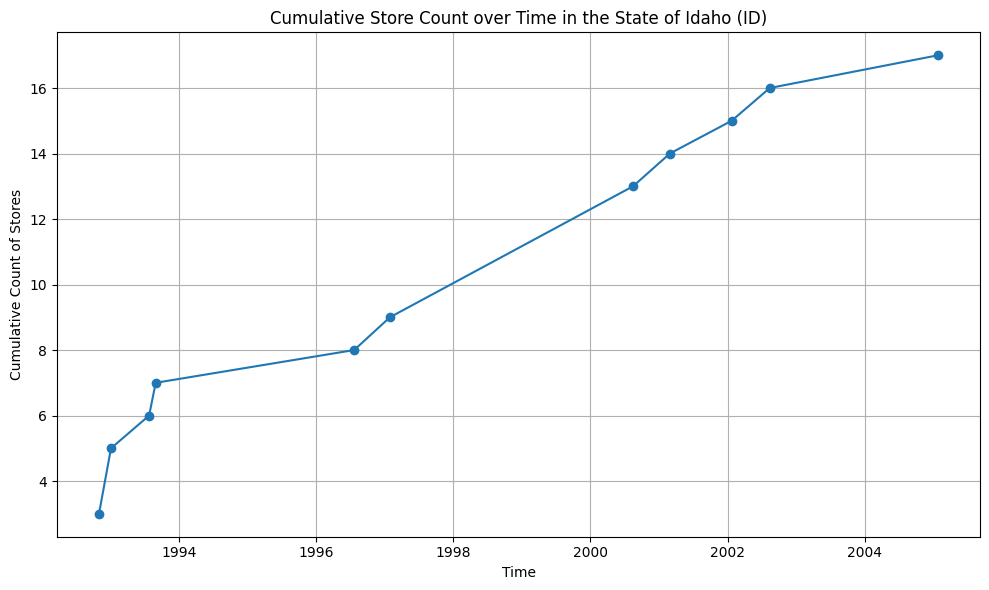

In [5]:
# Your answer to Graded Task 4 here:
import matplotlib.pyplot as plt

data_ts = cumsum_date_state(csvdata, 'ID')

plt.figure(figsize=(10, 6))
plt.plot(data_ts['date'], data_ts['cumsum'], marker='o', linestyle='-')
plt.title('Cumulative Store Count over Time in the State of Idaho (ID)')
plt.xlabel('Time')
plt.ylabel('Cumulative Count of Stores')
plt.grid(True)
plt.tight_layout()
plt.show()


#### [GRADED  TASK 5]
Using any of the three plotting libraries we discussed (`matplotlib`, `seaborn`, or `bokeh`), plot a bar chart that shows the `total` number of Walmart stores in each of the states that directly border the state of Utah (Arkansas (AR)).

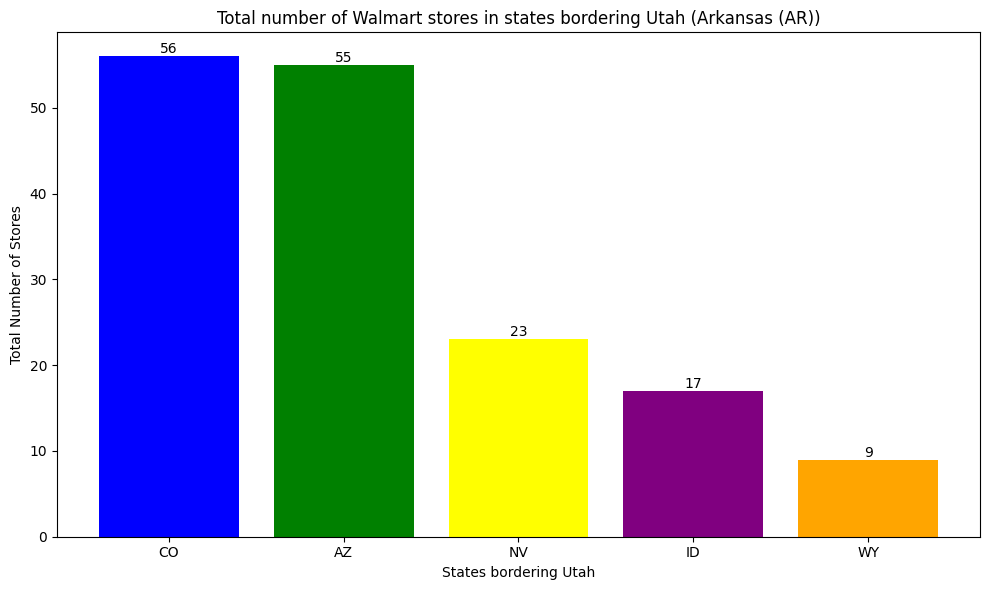

In [8]:
# Your asnwer to Graded Task 5 here:
import matplotlib.pyplot as plt

total = csvdata.groupby(["STRSTATE"], as_index=False).count()
border_states = total.loc[total['STRSTATE'].isin(['AZ', 'CO', 'ID', 'NV', 'WY'])]
border_states = border_states.sort_values(by='storenum', ascending=False)

state_names = border_states["STRSTATE"]
tot_stores = border_states["storenum"]

plt.figure(figsize=(10, 6))
plt.bar(state_names, tot_stores, color=['blue', 'green', 'yellow', 'purple', 'orange'])
plt.xlabel("States bordering Utah")
plt.ylabel("Total Number of Stores")
plt.title("Total number of Walmart stores in states bordering Utah (Arkansas (AR))")

# Adding text labels for each bar
for i, count in enumerate(tot_stores):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()
